In [1]:
import tensorflow as tf
# check if GPU is available
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [2]:
import pathlib
import  numpy as np
data_dir= pathlib.Path("dogs_breeds_model/dog_breeds_2/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['dachshund' 'golden_retriever' 'husky' 'labrador']


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)
    print(random_image)
    img = mpimg.imread(target_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    print(f"Image shape:{img.shape}")
    return img

['golden-retriever-in-the-field-with-yellow-flowers-6219018.jpeg']
Image shape:(408, 612, 3)


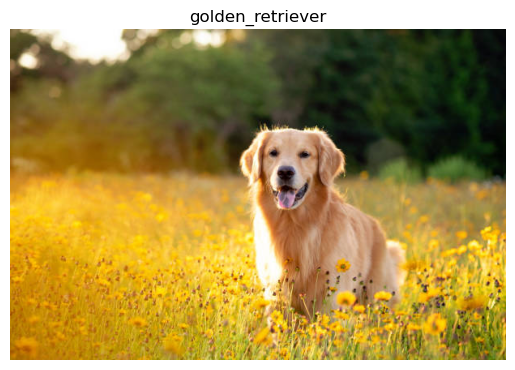

In [6]:
img = view_random_image(target_dir="dogs_breeds_model/dog_breeds_2/train/",target_class="golden_retriever")

In [7]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential



In [8]:
# plot validation and training curves seperately
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss =  history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    

In [10]:
train_dir ="dogs_breeds_model/dog_breeds_2/train/"
test_dir = "dogs_breeds_model/dog_breeds_2/test/"


In [11]:
import tensorflow as tf

import tensorflow_hub as hub
from tensorflow.keras import layers


In [12]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

# # New: EfficientNetB0 feature vector (version 2)
# efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2" 

In [13]:
def create_model(model_url,num_classes=10):
    feature_extractor_layer= hub.KerasLayer(model_url,trainable=False,name="feature_extraction_layer",input_shape=IMAGE_SHAPE+(3,)) # freeze the already learned patterns
    model = tf.keras.Sequential([
        feature_extractor_layer,
        layers.Dense(num_classes,activation="softmax",name="output_layer")
    ])     
    return model

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE =(224,224)
EPOCHS =5
BATCH_SIZE=32

In [17]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [18]:
print("Training Images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,target_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,batch_size=BATCH_SIZE,class_mode="categorical",target_size=IMAGE_SHAPE)

Training Images:
Found 421 images belonging to 4 classes.
Found 141 images belonging to 4 classes.


In [19]:
resent_model = create_model(resnet_url,num_classes=4)


In [20]:
resent_model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [21]:
# creating a tensorboard call back 
import datetime

def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"Saving Tensorboard log files to : {log_dir}")
    return tensorboard_callback

In [22]:
resent_history= resent_model.fit(train_data_10_percent,epochs=EPOCHS,steps_per_epoch=len(train_data_10_percent),validation_data=test_data,callbacks = [create_tensorboard_callback(dir_name="tensorflow_hub",experiment_name="resent50v2")])

Saving Tensorboard log files to : tensorflow_hub/resent50v2/20230727-001617
Epoch 1/5
14/14 [==============================] - 55s 3s/step - loss: 1.2200 - accuracy: 0.4893 - val_loss: 0.4983 - val_accuracy: 0.7801
Epoch 2/5
14/14 [==============================] - 35s 3s/step - loss: 0.4547 - accuracy: 0.8266 - val_loss: 0.3622 - val_accuracy: 0.8511
Epoch 3/5
14/14 [==============================] - 13s 848ms/step - loss: 0.3343 - accuracy: 0.8694 - val_loss: 0.3192 - val_accuracy: 0.8511
Epoch 4/5
14/14 [==============================] - 28s 2s/step - loss: 0.2456 - accuracy: 0.9097 - val_loss: 0.3028 - val_accuracy: 0.8794
Epoch 5/5
14/14 [==============================] - 13s 932ms/step - loss: 0.1939 - accuracy: 0.9382 - val_loss: 0.3258 - val_accuracy: 0.8652


In [24]:
resent_model.evaluate(test_data)

5/5 [==============================] - 4s 638ms/step - loss: 0.3258 - accuracy: 0.8652


[0.3257944881916046, 0.8652482032775879]

In [25]:
# plot validation and training curves seperately
import matplotlib.pyplot as plt
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss =  history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    epochs = range(len(history.history["loss"]))
    

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    


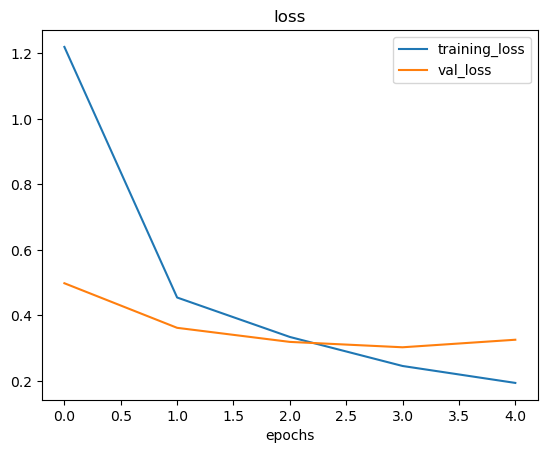

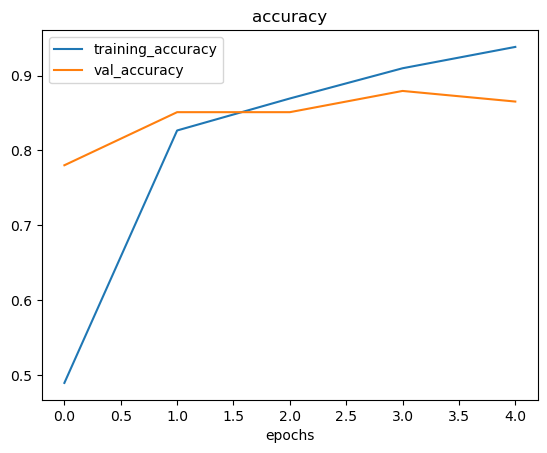

In [26]:
plot_loss_curves(resent_history)

In [29]:
def load_and_prep_image(filename,img_shape=224):
    img= tf.io.read_file(filename)
    img= tf.image.decode_image(img)
    img = tf.image.resize(img,size=[img_shape,img_shape])
    img = img/255.
    return img

In [30]:
def pred_and_plot(model,filename,class_names=class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0))
    print(pred)
    confidence = tf.reduce_max(pred)
    second_confidence = tf.math.top_k(pred,2)[0][0][1]
    if len(pred[0])>1:
        pred_class= class_names[tf.argmax(pred[0])]
    else:
        pred_class= class_names[int(tf.round(pred[0]))]

    if confidence>0.5:
        plt.title(f"{pred_class} with {confidence*100:.2f}% confidence.")
    else:
        print(f"cross between {class_names[tf.argmax(pred[0])]} and {class_names[tf.math.top_k(pred,2)[1][0][1]]} with {confidence*100:.2f}% confidence.")
    # print(f"{pred_class} with {confidence*100:.2f}% confidence.")
    plt.imshow(img)
    plt.axis(False)

[[0.00926645 0.8454096  0.00458468 0.14073923]]


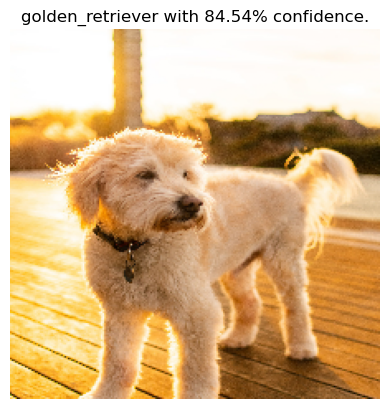

In [33]:
pred_and_plot(resent_model,r"C:\Python\Deep_Learning\Personal\testing_doodle_2.jpg")

In [34]:
# print all class names
class_names

array(['dachshund', 'golden_retriever', 'husky', 'labrador'], dtype='<U16')